# Finding best model with Gaussian Process Regression (GPR)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
# import own modules
import run_gpr
from gpr_alg import plot_data

# import external modules
import warnings
import pandas as pd
import numpy as np
import sklearn.gaussian_process as gp

## Find best model

We start be performing a grid search to find the best model for the given dataset. The ouput is saved in a file.

In [4]:
# Load statistics from model fitting with different kernels
store = pd.HDFStore('grid_search_stats_2D_100_iterations_with_noise.h5')
model_stats = store['df']

model_stats

,kernel,stats,pred_mean,pred_cov
0,RBF: {'length_scale': 9.999999999999997e-06},0.127797,"[-0.3576861091606787, 0.31376967450947496, 1.1...","[[2.9999990969198365e-07, 0.0, 0.0, 0.0, 0.0, ..."
6,RationalQuadratic: {'length_scale': 1.00009282...,0.127797,"[-0.3576861091606504, 0.3137696745095387, 1.16...","[[2.9999990946993904e-07, 6.63067979022507e-21..."
7,RationalQuadratic: {'length_scale': 0.03734447...,0.076397,"[-0.3576858274706942, 0.3137699547543631, 1.16...","[[2.999997458230652e-07, 9.681144774731365e-14..."
8,RationalQuadratic: {'length_scale': 0.03734447...,0.076397,"[-0.3576858274709438, 0.31376995475425296, 1.1...","[[2.99999744268753e-07, 9.769962616701378e-14,..."
9,RationalQuadratic: {'length_scale': 0.03734453...,0.076397,"[-0.35768582747104793, 0.31376995475432734, 1....","[[2.999997452679537e-07, 9.792167077193881e-14..."
10,RationalQuadratic: {'length_scale': 0.03734448...,0.076397,"[-0.35768582747061495, 0.3137699547544046, 1.1...","[[2.999997463781767e-07, 9.747758156208874e-14..."
11,RationalQuadratic: {'length_scale': 0.03734449...,0.076397,"[-0.3576858274706891, 0.31376995475440506, 1.1...","[[2.9999974660022133e-07, 9.792167077193881e-1..."
12,RBF + WhiteKernel: {'k1': RBF(length_scale=0.2...,0.383307,"[0.11286503056705044, 0.608093792635306, 1.167...","[[0.30580189619370324, 0.04310382251599554, 0...."
13,RationalQuadratic + WhiteKernel: {'k1': Ration...,0.383306,"[0.11286377456815799, 0.6080922238643334, 1.16...","[[0.3058013618668527, 0.0431038406211699, 0.02..."


In [6]:
# Sort dataframe
model_stats = model_stats.sort_values(by=['stats'])
model_stats

,kernel,stats,pred_mean,pred_cov
7,RationalQuadratic: {'length_scale': 0.03734447...,0.076397,"[-0.3576858274706942, 0.3137699547543631, 1.16...","[[2.999997458230652e-07, 9.681144774731365e-14..."
10,RationalQuadratic: {'length_scale': 0.03734448...,0.076397,"[-0.35768582747061495, 0.3137699547544046, 1.1...","[[2.999997463781767e-07, 9.747758156208874e-14..."
11,RationalQuadratic: {'length_scale': 0.03734449...,0.076397,"[-0.3576858274706891, 0.31376995475440506, 1.1...","[[2.9999974660022133e-07, 9.792167077193881e-1..."
8,RationalQuadratic: {'length_scale': 0.03734447...,0.076397,"[-0.3576858274709438, 0.31376995475425296, 1.1...","[[2.99999744268753e-07, 9.769962616701378e-14,..."
9,RationalQuadratic: {'length_scale': 0.03734453...,0.076397,"[-0.35768582747104793, 0.31376995475432734, 1....","[[2.999997452679537e-07, 9.792167077193881e-14..."
6,RationalQuadratic: {'length_scale': 1.00009282...,0.127797,"[-0.3576861091606504, 0.3137696745095387, 1.16...","[[2.9999990946993904e-07, 6.63067979022507e-21..."
0,RBF: {'length_scale': 9.999999999999997e-06},0.127797,"[-0.3576861091606787, 0.31376967450947496, 1.1...","[[2.9999990969198365e-07, 0.0, 0.0, 0.0, 0.0, ..."
13,RationalQuadratic + WhiteKernel: {'k1': Ration...,0.383306,"[0.11286377456815799, 0.6080922238643334, 1.16...","[[0.3058013618668527, 0.0431038406211699, 0.02..."
12,RBF + WhiteKernel: {'k1': RBF(length_scale=0.2...,0.383307,"[0.11286503056705044, 0.608093792635306, 1.167...","[[0.30580189619370324, 0.04310382251599554, 0...."


In [7]:
for row in range(model_stats.shape[0]):
    print(model_stats['kernel'].iloc[row])

RationalQuadratic: {'length_scale': 0.03734447407823261, 'alpha': 0.1610358606207728}
RationalQuadratic: {'length_scale': 0.037344480050568785, 'alpha': 0.16103582462481383}
RationalQuadratic: {'length_scale': 0.037344492342932856, 'alpha': 0.16103588459815904}
RationalQuadratic: {'length_scale': 0.03734447932876367, 'alpha': 0.16103602415811527}
RationalQuadratic: {'length_scale': 0.03734453050170316, 'alpha': 0.16103615239651656}
RationalQuadratic: {'length_scale': 1.0000928257457148e-05, 'alpha': 0.9992434713711763}
RBF: {'length_scale': 9.999999999999997e-06}
RationalQuadratic + WhiteKernel: {'k1': RationalQuadratic(alpha=1e+05, length_scale=0.243), 'k2': WhiteKernel(noise_level=0.246), 'k1__length_scale': 0.24269833034323152, 'k1__alpha': 100000.00000000001, 'k1__length_scale_bounds': (1e-05, 100000.0), 'k1__alpha_bounds': (1e-05, 100000.0), 'k2__noise_level': 0.24586614709859986, 'k2__noise_level_bounds': (1e-05, 100000.0)}
RBF + WhiteKernel: {'k1': RBF(length_scale=0.243), 'k2':

We compare the analyse the fit with the mean absolut error and the best model where the kernel includes a white noise kernel.

In [8]:
# Get model with smallest mean absolut error
mean_prediction_best =  model_stats['pred_mean'].iloc[0]
cov_prediction_best = model_stats['pred_cov'].iloc[0]

print('Kernel: ' + str(model_stats['kernel'].iloc[0]))
print('Mean absolut error: ' + str(model_stats['stats'].iloc[0]))

Kernel: RationalQuadratic: {'length_scale': 0.03734447407823261, 'alpha': 0.1610358606207728}
Mean absolut error: 0.07639668797494308


In [9]:
# Get model with smallest mean absolut error and white noise kernel
mean_prediction_wk =  model_stats['pred_mean'].iloc[7]
cov_prediction_wk = model_stats['pred_cov'].iloc[7]

print('Kernel: ' + str(model_stats['kernel'].iloc[7]))
print('Mean absolut error: ' + str(model_stats['stats'].iloc[7]))

Kernel: RationalQuadratic + WhiteKernel: {'k1': RationalQuadratic(alpha=1e+05, length_scale=0.243), 'k2': WhiteKernel(noise_level=0.246), 'k1__length_scale': 0.24269833034323152, 'k1__alpha': 100000.00000000001, 'k1__length_scale_bounds': (1e-05, 100000.0), 'k1__alpha_bounds': (1e-05, 100000.0), 'k2__noise_level': 0.24586614709859986, 'k2__noise_level_bounds': (1e-05, 100000.0)}
Mean absolut error: 0.38330628864554694


In [10]:
# Load grid and data
grid_x1, grid_x2, grid_train, full_grid, data_train, data = run_gpr.create_2D_data(add_noise=True)

<IPython.core.display.Javascript object>


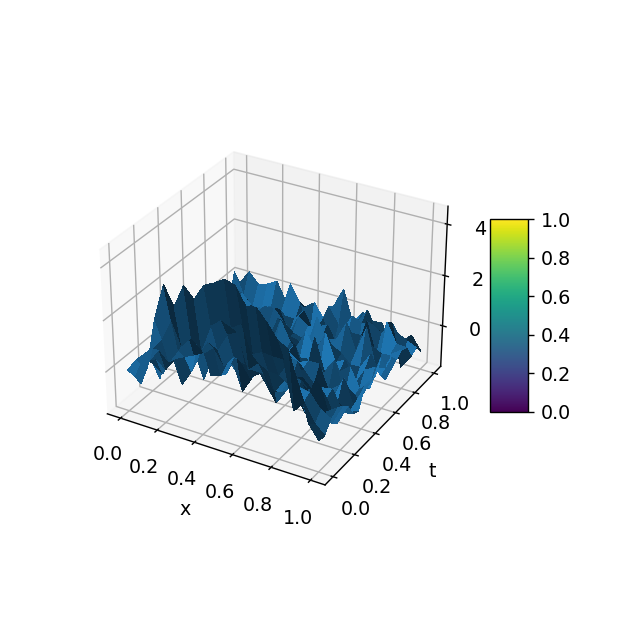

In [10]:
# Plot original data
plot_data.make_3D_surface_plot(x=grid_x1, y=grid_x2, z=data.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]))

<IPython.core.display.Javascript object>


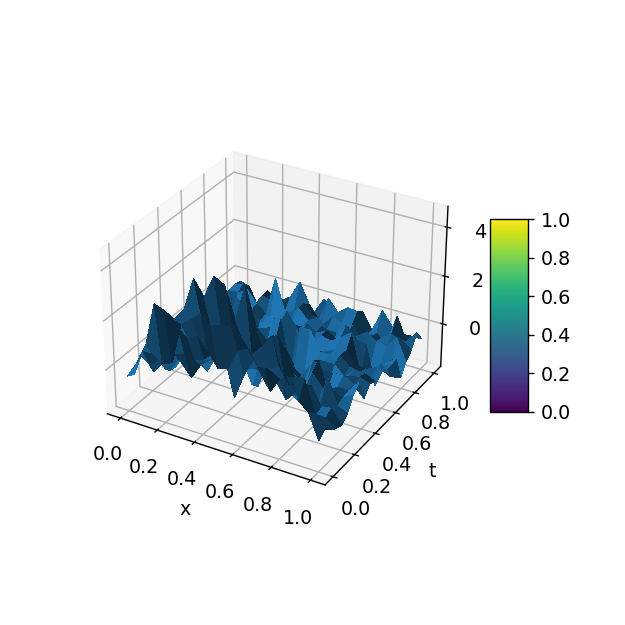

<IPython.core.display.Javascript object>


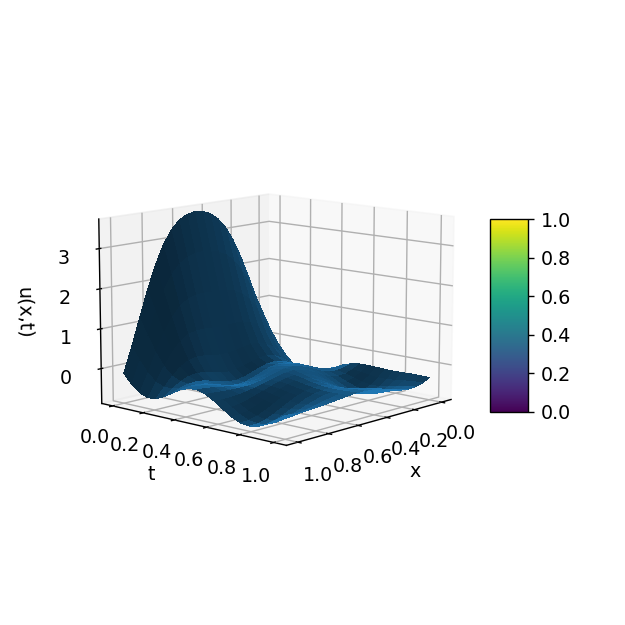

In [11]:
# Plot fitted data
plot_data.make_3D_surface_plot(x=grid_x1, y=grid_x2, z=mean_prediction_best.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]))

plot_data.make_3D_surface_plot(x=grid_x1, y=grid_x2, z=mean_prediction_wk.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]))

<IPython.core.display.Javascript object>


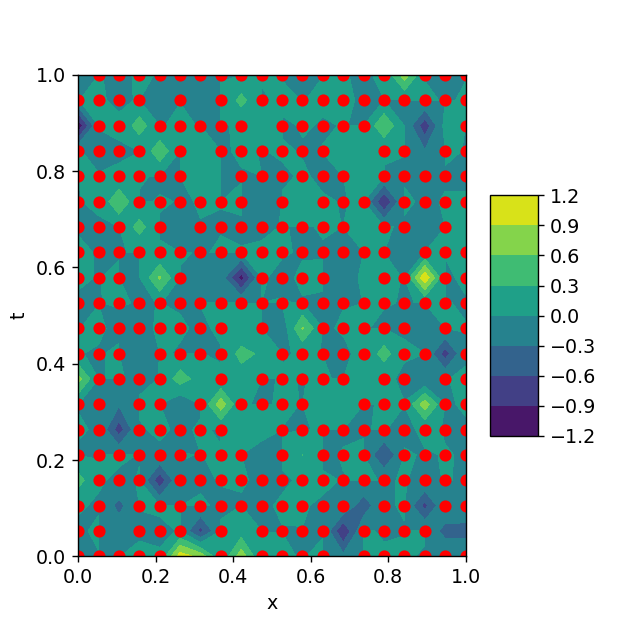

<IPython.core.display.Javascript object>


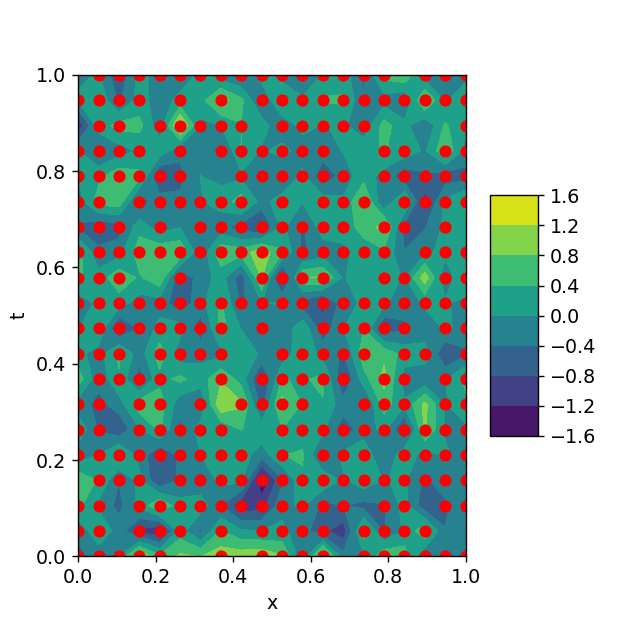

In [12]:
error_best = data.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]) - mean_prediction_best.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1])
error_wk = data.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]) - mean_prediction_wk.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1])

# Plot error
plot_data.make_3D_contour_plot(x=grid_x1, y=grid_x2, z=error_best, add_train=True, x_train=grid_train[:,0], y_train=grid_train[:,1])

plot_data.make_3D_contour_plot(x=grid_x1, y=grid_x2, z=error_wk, add_train=True, x_train=grid_train[:,0], y_train=grid_train[:,1])

<IPython.core.display.Javascript object>


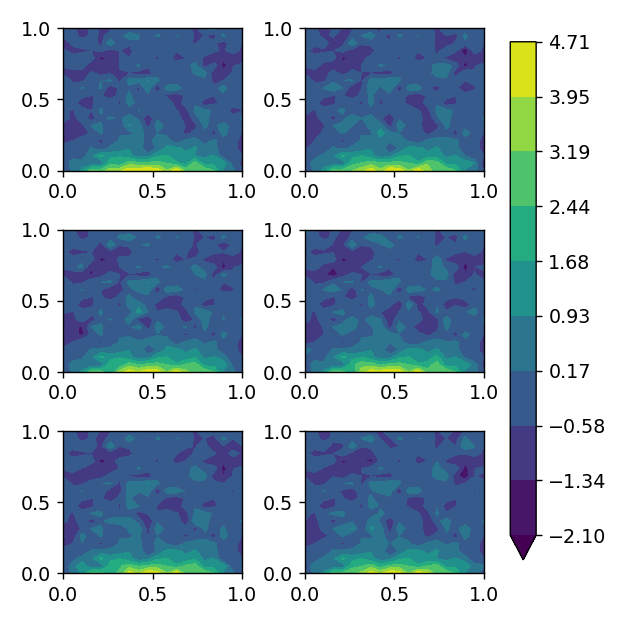

<IPython.core.display.Javascript object>


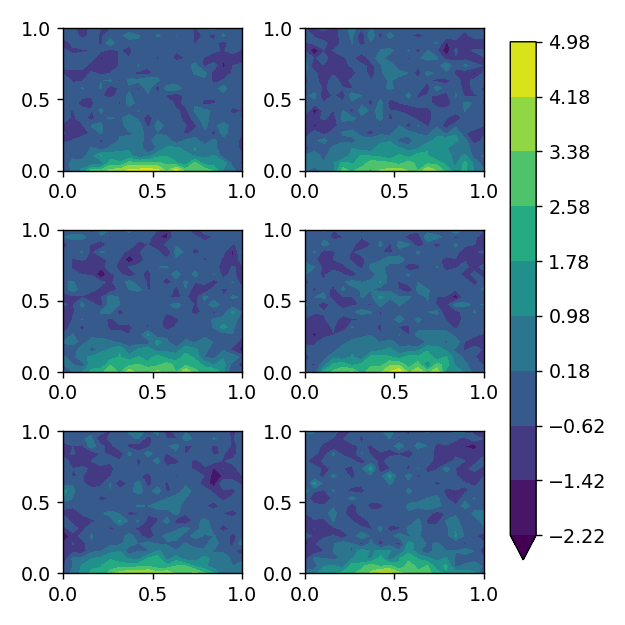

In [13]:
# Plot posteriors
posteriors = plot_data.plot_posteriors(x=grid_x1, y=grid_x2, z=data.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]), mean_pred=mean_prediction_best.flatten(),
                                               cov_pred=cov_prediction_best,
                                               posterior_nums=5, add_train_ind=False, x_train_val=grid_train)

posteriors = plot_data.plot_posteriors(x=grid_x1, y=grid_x2, z=data.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]), mean_pred=mean_prediction_wk.flatten(),
                                               cov_pred=cov_prediction_wk,
                                               posterior_nums=5, add_train_ind=False, x_train_val=grid_train)

## Fit specific model